 # Storytelling Through Data Visualization
 ## Improviing Plot Aesthetics

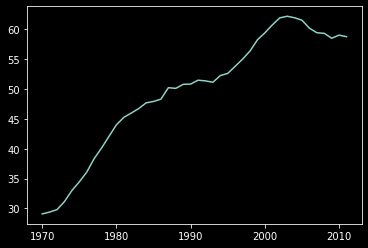

In [1]:
# Generating one line graph
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
plt.plot(women_degrees['Year'], women_degrees['Biology'])
plt.show()


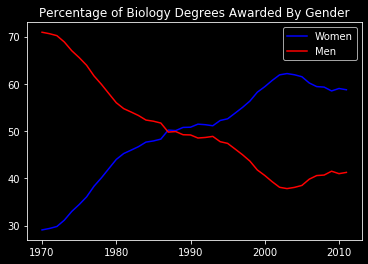

In [2]:
# Generating two lines graph
fig = plt.figure()
men_biology = 100 - women_degrees['Biology']

plt.plot(women_degrees['Year'], women_degrees['Biology'], c = 'blue', label = 'Women')
plt.plot(women_degrees['Year'], men_biology, c = 'red', label = 'Men')

plt.legend(loc = "upper right")
plt.title("Percentage of Biology Degrees Awarded By Gender")
plt.show()


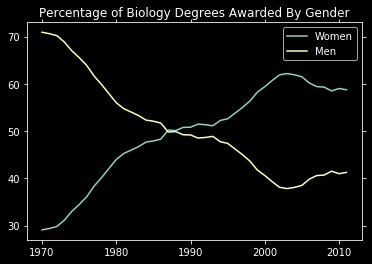

In [3]:
# Customize the appearane of the ticks

fig, ax = plt.subplots()
ax.plot(women_degrees['Year'], women_degrees['Biology'], label='Women')
ax.plot(women_degrees['Year'], 100-women_degrees['Biology'], label='Men')

ax.tick_params(bottom="off", top="off", left="off", right="off")
ax.set_title('Percentage of Biology Degrees Awarded By Gender')
ax.legend(loc="upper right")
plt.show()


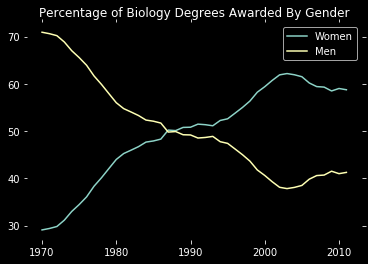

In [4]:
# Remove the Spines in the Chart

fig, ax = plt.subplots()
ax.plot(women_degrees['Year'], women_degrees['Biology'], label='Women')
ax.plot(women_degrees['Year'], 100-women_degrees['Biology'], label='Men')
ax.tick_params(bottom="off", top="off", left="off", right="off")
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

ax.legend(loc='upper right')
ax.set_title('Percentage of Biology Degrees Awarded By Gender')
plt.show()


 Another way of removing spines

In [5]:
for key, spine in ax.spines.items():
    spine.set_visible(False)


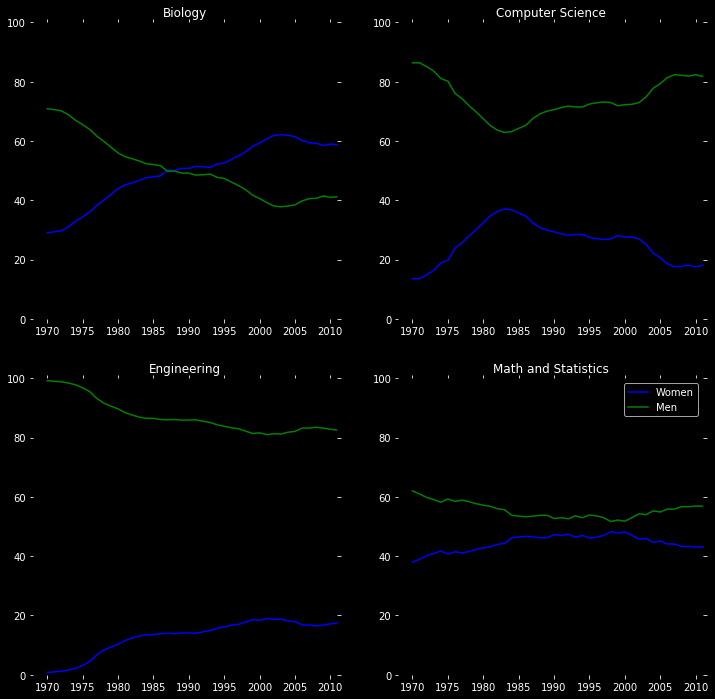

In [6]:
# Generating 2x2 graph with no tick and no spines

major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c='green', label='Men')
    ax.set_title(major_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0, 100)

# Calling pyplot.legend() here will add the legend to the last subplot that was created.
plt.legend(loc='upper right')
plt.show()


 ## Color, Layout nd Annotations

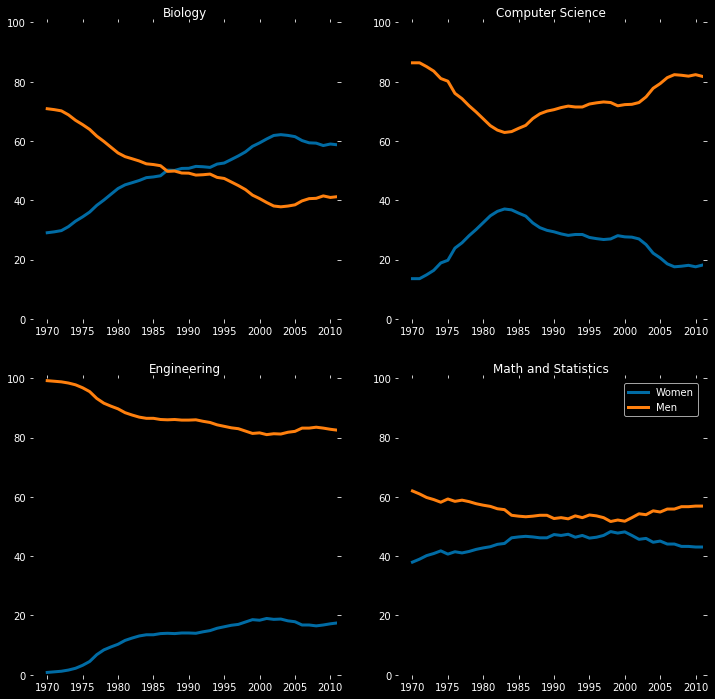

In [7]:
# Using RBG color in the graph & Setting the line width

cb_dark_blue = (0/255, 107/255, 164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    # Set the line width when specifying how each line should look & The color for each line is assigned here
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c=cb_dark_blue, label='Women', linewidth = 3)
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c=cb_orange, label='Men', linewidth =3)

    # Remove the spines
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(major_cats[sp])

    # Revmoe the ticks
    ax.tick_params(bottom="off", top="off", left="off", right="off")

plt.legend(loc='upper right')
plt.show()


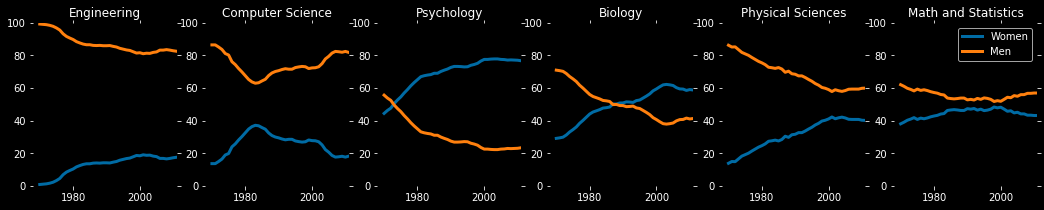

In [8]:
# Generating 1x6 graph

stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")

plt.legend(loc='upper right')
plt.show()


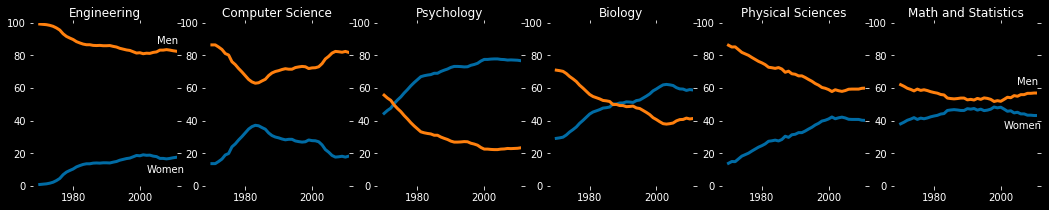

In [9]:
# Add text to the axes

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
    
plt.show()


 ## Conditional Plots

 Seaborn:
 * Is built on top of matplotlib.
 * Has good support for more complex plots.
 * Attractive default styles.
 * Integrates well with the pandas library.


 `seaborn.set_style()` function to change the default seaborn style sheet:

 **darkgrid**: Coordinate grid displayed, dark background color

 **whitegrid**: Coordinate grid displayed, white background color

 **dark**: Coordinate grid hidden, dark background color

 **white**: Coordinate grid hidden, white background color

 **ticks**: Coordinate grid hidden, white background color, ticks visible

In [10]:
import pandas as pd
cols = ["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
titanic = pd.read_csv("train.csv")
titanic = titanic[cols].dropna()


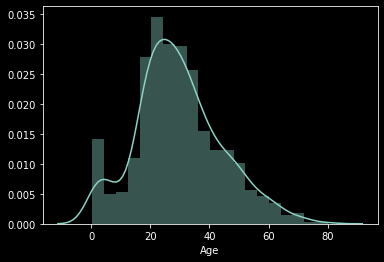

In [11]:
# Drawing the distribution plots (historgram)

import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(titanic["Age"])
plt.show()


Text(0.5, 0, 'Age')

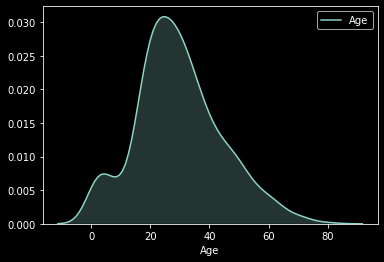

In [12]:
# Drawing Kernel Density Plot (a smoother version of the histogram)

sns.kdeplot(titanic["Age"], shade = True)
plt.xlabel("Age")


Text(0.5, 0, 'Age')

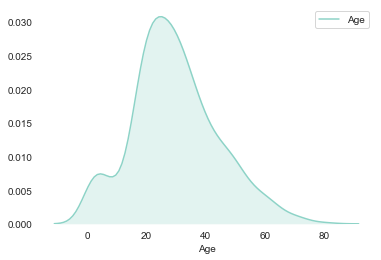

In [13]:
# Setting the style of kernel density plot

sns.set_style('white')
sns.kdeplot(titanic['Age'], shade=True)
sns.despine(left=True, bottom=True)
plt.xlabel('Age')


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


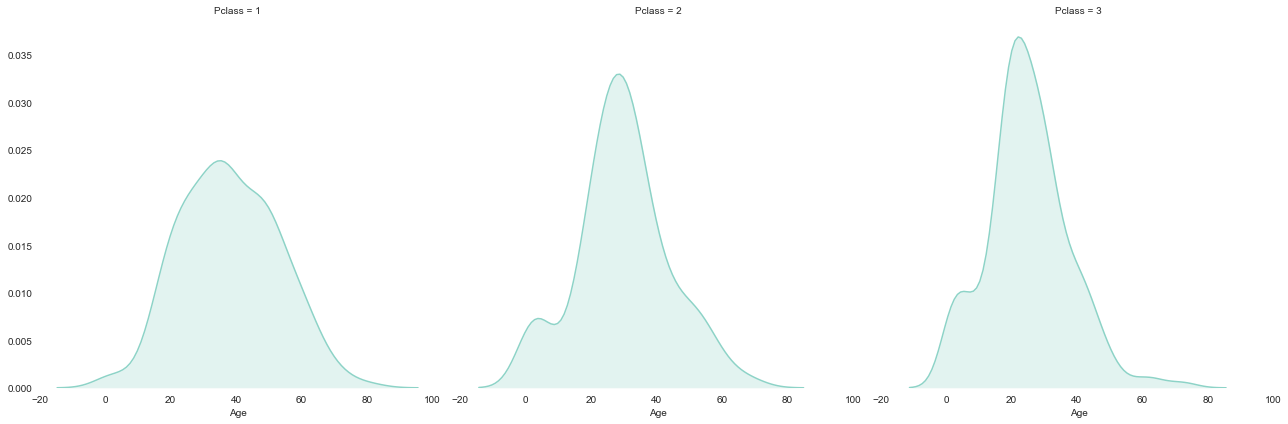

In [14]:

# Condition on unique values of the "Pclass" column
g = sns.FacetGrid(titanic, col="Pclass", size = 6)

# For each subset of values, generate a kernel density plot of the "Age" columns
g.map(sns.kdeplot, "Age", shade=True)
sns.despine(left=True,bottom=True)

# *size* speicifies the height in inches of each plot


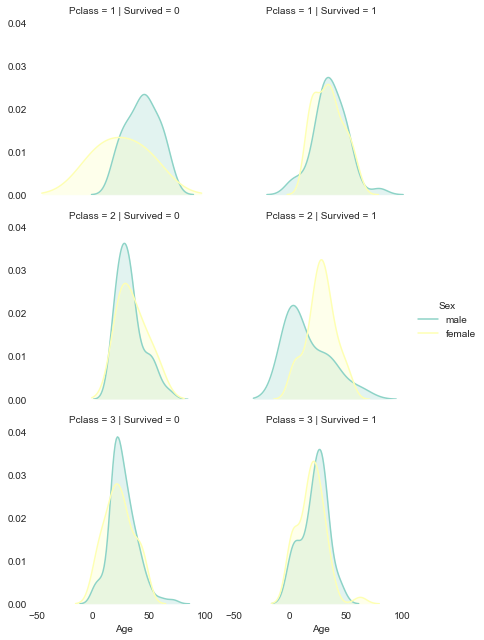

In [15]:
# adding hue as shade in the conditional plot

g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue="Sex", size=3)
g.map(sns.kdeplot, "Age", shade=True)
g.add_legend()
sns.despine(left=True, bottom=True)
plt.show()


 # Visualizing Geographic Data

In [16]:
import pandas as pd
airlines = pd.read_csv("airlines.csv")
airports = pd.read_csv("airports.csv")
routes = pd.read_csv("routes.csv")


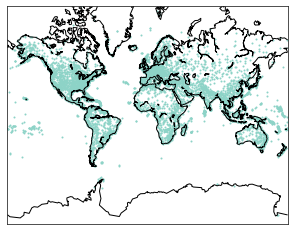

In [17]:
# Drawing a 2D map

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()
x, y = m(longitudes, latitudes)

# drawing using longtitudes & latitudes
m.scatter(x,y,s=1) # 's' represents the marker

# drawing the outlines of the coastline
m.drawcoastlines()
plt.show()


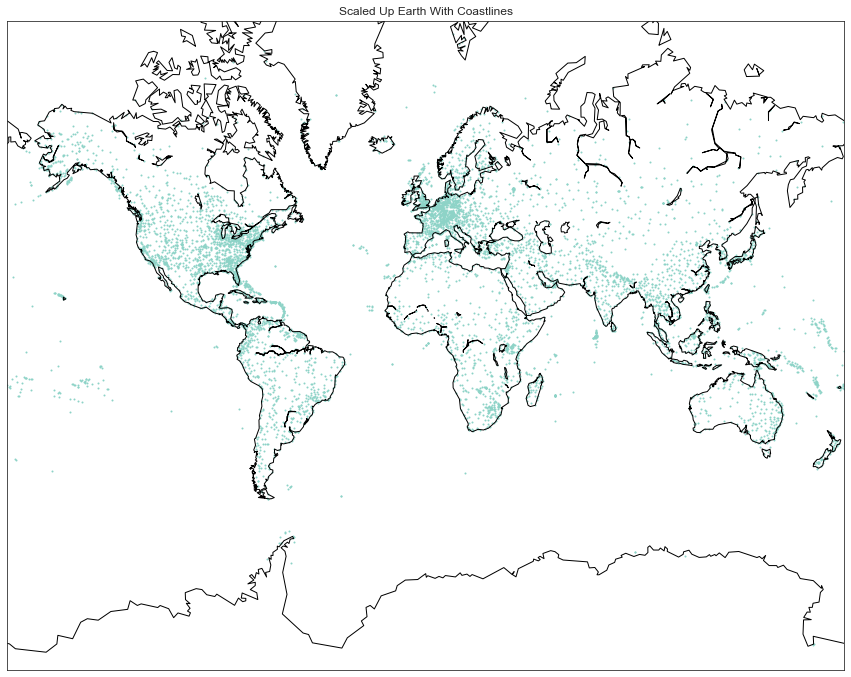

In [18]:
# Creating the basemap instance with matplotlib.pyplot and mpl_toolkits.basemap

fig,ax = plt.subplots(figsize=(15,20))
plt.title("Scaled Up Earth With Coastlines")

m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()
x, y = m(longitudes, latitudes)
m.scatter(x, y, s=1)
m.drawcoastlines()
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
airline      67428 non-null object
source       67428 non-null object
dest         67428 non-null object
equipment    67410 non-null object
start_lon    67428 non-null float64
end_lon      67428 non-null float64
start_lat    67428 non-null float64
end_lat      67428 non-null float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB


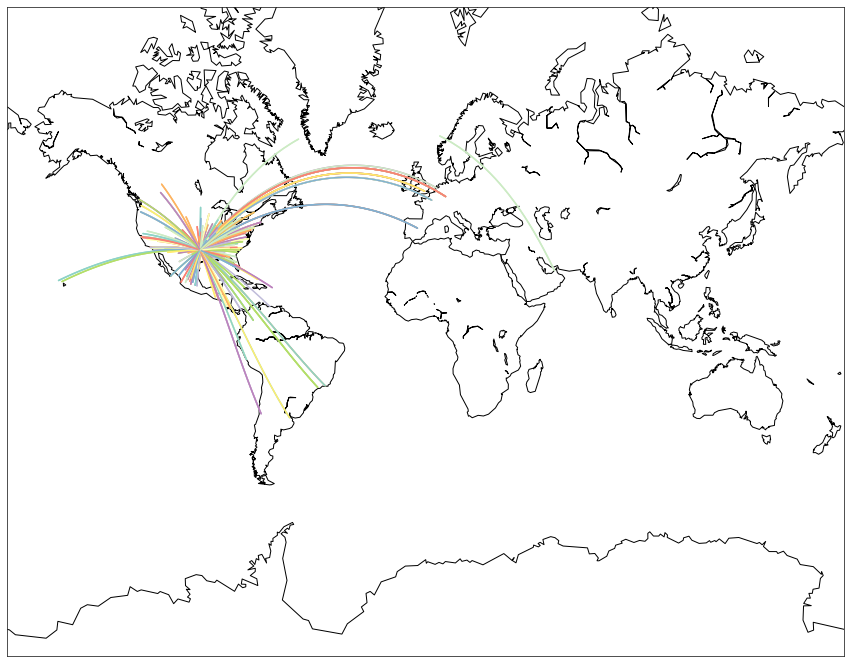

In [19]:
# Drawing a 3D map

import pandas as pd
geo_routes = pd.read_csv("geo_routes.csv")
geo_routes.info()

next(geo_routes.iterrows())

fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

def create_great_circles(df):
    for index, row in df.iterrows():
        end_lat, start_lat = row['end_lat'], row['start_lat']
        end_lon, start_lon = row['end_lon'], row['start_lon']
        if abs(end_lat - start_lat) < 180:
            if abs(end_lon - start_lon) < 180:
                m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat)

dfw = geo_routes[geo_routes['source'] == "DFW"]
create_great_circles(dfw)
plt.show()


 `basemap.drawgreatcircle()` method to display a great circle between 2 points. The basemap.drawgreatcircle() method requires four parameters in the following order:
 * lon1 - longitude of the starting point.
 * lat1 - latitude of the starting point.
 * lon2 - longitude of the ending point.
 * lat2 - latitude of the ending point.